In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
tf.random.set_seed(1)

In [2]:
dataset=pd.read_csv('./train_mode2_TC.csv')

#데이터를 8:2로 분할    
train_mode2_train=dataset.sample(frac=0.8,random_state=0) 
train_mode2_test = dataset.drop(train_mode2_train.index)

    

print("train")
print(train_mode2_train.shape)

print("test")
print(train_mode2_test.shape)

train
(40806, 6)
test
(10202, 6)


In [3]:
train_labels = train_mode2_train.pop('state')
test_labels = train_mode2_test.pop('state')

# n default: 64

In [4]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(9, activation='relu', input_shape=[len(train_mode2_train.keys())]),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),  
    keras.layers.Dense(1)
  ])

              
  optimizer = tf.keras.optimizers.RMSprop(0.00125)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [5]:
model1=build_model()
model2=build_model()
model3=build_model()



model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [6]:
EPOCHS=100
#
print(EPOCHS)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print(epoch/100, end=' ')
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

print(1)
history1 = model1.fit(train_mode2_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])
print(2)
history2 = model2.fit(train_mode2_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])
print(3)
history3 = model3.fit(train_mode2_train, train_labels, epochs=EPOCHS,
                    validation_split = 0.25, verbose=0, callbacks=[early_stop, PrintDot()])



#model 확인

100
1

0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 2

0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 3

0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 

In [7]:
#데이터프레임으로 결과저장
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch





hist1.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
20,0.361192,0.369425,0.361192,0.149294,0.310793,0.149294,20
21,0.588828,0.383145,0.588828,0.148179,0.311329,0.148179,21
22,0.592214,0.404144,0.592214,0.164168,0.346174,0.164168,22
23,0.315291,0.361902,0.315291,0.151448,0.315063,0.151448,23
24,0.289614,0.355453,0.289614,0.153421,0.333783,0.153421,24


In [8]:
#학습된 모델로 예측
test_predictions1 = model1.predict(train_mode2_test).flatten()
test_predictions2 = model2.predict(train_mode2_test).flatten()
test_predictions3 = model3.predict(train_mode2_test).flatten()


test_predictions_mean=pd.DataFrame()

test_predictions_mean=(test_predictions1+test_predictions2+test_predictions3)/3

print(test_predictions1)
print(test_predictions_mean)
#af=plt.scatter(test_labels, test_predictions_mean)

#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([-1,plt.ylim()[2]])
#_ = plt.plot([-100, 100], [-100, 100])

[0.38674033 0.4464749  0.46184006 ... 0.04151776 0.37687162 0.865669  ]
[0.5335827  0.65383357 0.7052328  ... 0.20666127 0.5846972  0.967603  ]


Text(0.5, 0, 'System Predictions')

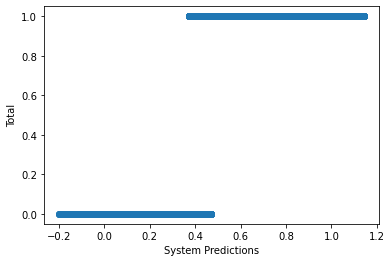

In [22]:
plt.scatter(test_predictions1, test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0.5, 0, 'System Predictions')

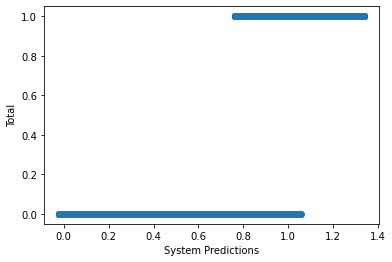

In [19]:
plt.scatter(test_predictions2, test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


Text(0, 0.5, 'System Predictions')

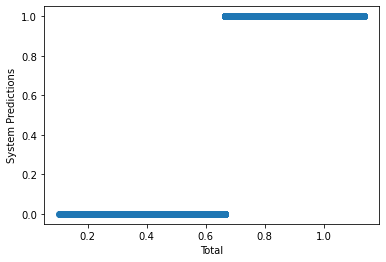

In [20]:
plt.scatter(test_predictions3, test_labels)
plt.xlabel('Total')
plt.ylabel('System Predictions')


Text(0.5, 0, 'System Predictions')

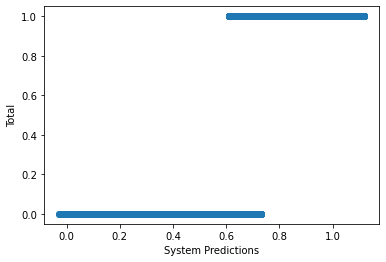

In [21]:
plt.scatter(test_predictions_mean,test_labels)
plt.ylabel('Total')
plt.xlabel('System Predictions')


(array([ 133.,  325.,  652.,  579.,  243.,  272.,  234.,  265., 1942.,
        2919., 1189.,   63.,   57.,   68.,   85.,  153.,  184.,  330.,
         369.,  140.]),
 array([-0.1973648 , -0.13038002, -0.06339524,  0.00358955,  0.07057433,
         0.13755912,  0.2045439 ,  0.2715287 ,  0.33851346,  0.40549827,
         0.47248304,  0.5394678 ,  0.6064526 ,  0.6734374 ,  0.7404222 ,
         0.80740696,  0.87439173,  0.9413765 ,  1.0083613 ,  1.0753461 ,
         1.1423309 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1ec51444b08>])

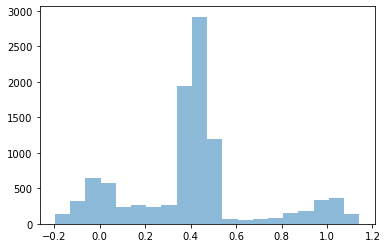

In [15]:
plt.hist(test_predictions1,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([1143.,  436.,  281.,  139.,   48.,   52.,   30.,   43.,  742.,
         508.,  686.,  969., 1455.,  559.,  511.,  967.,  762.,  385.,
         203.,  283.]),
 array([-0.01958703,  0.0482701 ,  0.11612722,  0.18398434,  0.25184146,
         0.31969857,  0.38755572,  0.45541283,  0.52326995,  0.5911271 ,
         0.6589842 ,  0.72684133,  0.7946984 ,  0.86255556,  0.93041265,
         0.9982698 ,  1.066127  ,  1.1339841 ,  1.2018411 ,  1.2696983 ,
         1.3375554 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1ec51298488>])

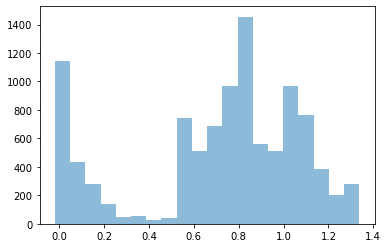

In [10]:
plt.hist(test_predictions2,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([  84.,   70.,   77.,  453.,  570.,  409.,  432.,  277.,  213.,
         225., 5740.,   97.,  172.,   91.,  136.,  128.,  308.,  436.,
         228.,   56.]),
 array([0.1042459 , 0.15580183, 0.20735775, 0.25891367, 0.3104696 ,
        0.36202553, 0.41358146, 0.4651374 , 0.5166933 , 0.5682492 ,
        0.61980516, 0.6713611 , 0.722917  , 0.77447295, 0.8260289 ,
        0.8775848 , 0.9291407 , 0.9806966 , 1.0322526 , 1.0838085 ,
        1.1353644 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1ec51307708>])

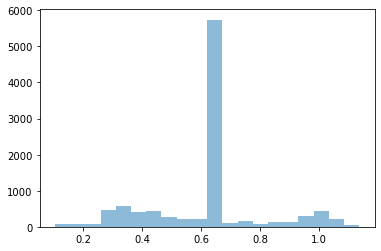

In [11]:
plt.hist(test_predictions3,bins=20, density=False, alpha=0.5,histtype='stepfilled')

(array([  68.,  498.,  557.,  331.,  286.,  225.,  253.,  219.,  209.,
         657.,  998., 2196., 1007.,  648.,  633.,  199.,  124.,  398.,
         533.,  163.]),
 array([-0.02705899,  0.0301597 ,  0.08737839,  0.14459708,  0.20181577,
         0.25903445,  0.31625316,  0.37347183,  0.43069053,  0.48790923,
         0.5451279 ,  0.6023466 ,  0.65956527,  0.716784  ,  0.7740027 ,
         0.83122134,  0.8884401 ,  0.94565874,  1.0028775 ,  1.0600961 ,
         1.1173148 ], dtype=float32),
 [<matplotlib.patches.Polygon at 0x1ec5136cc48>])

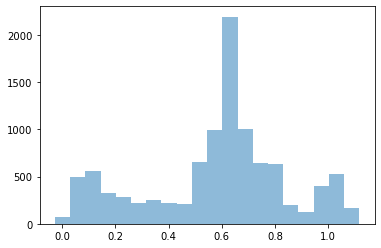

In [12]:
plt.hist(test_predictions_mean,bins=20, density=False, alpha=0.5,histtype='stepfilled')

In [13]:
#plt.hist(test_predictions,bins=20, density=False, alpha=0.5,histtype='stepfilled')
plt.show()